In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
import argparse
import math

In [2]:
tf.enable_eager_execution()

# Show example of images

In [3]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di)]
training_files = dirlist('testimages/')

def parse_visual(data):
    dataset = tf.data.TFRecordDataset(data)
    # pattern for one part file
    # dataset = tf.data.TFRecordDataset('part-r-00099')
    iterator = dataset.make_one_shot_iterator()

    features = {
        'B1': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B2': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B3': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B4': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B5': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B6': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B7': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B8': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B9': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B10': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B11': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True)
    }

    parsed_examples = [tf.parse_single_example(data, features) for data in iterator]
    return parsed_examples

parsed_examples = parse_visual(training_files[0])

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


In [4]:
def get_rgb_img_to_plot(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'int64')
    for i, band in enumerate(['B5', 'B3', 'B2']):
        band_data = parsed_example[band].numpy()
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
    return rgbArray

In [12]:
def clean_ee_borders(img, number_of_features):
    '''function to clean black pixels of a satellite picture'''
    for i in range(number_of_features):
        img[:,:,i][img[:,:,i]==0] = img[:,:,i].mean()
    return img

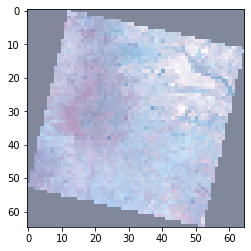

In [14]:
img= get_rgb_img_to_plot(parsed_examples[0])
img = clean_ee_borders(img,3)
plt.imshow(img);

In [6]:
def get_X_test_all_bands(parsed_example, intensify=True):
    elevenArray = np.zeros((65,65,11), 'int64')
    for i, band in enumerate(['B1','B4', 'B3', 'B2','B5','B6','B7','B8','B9','B10','B11']):
        band_data = parsed_example[band].numpy()
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        elevenArray[..., i] = band_data
    return elevenArray

In [15]:
X_test_image = get_X_test_all_bands(parsed_examples[0])
X_test_image = clean_ee_borders(X_test_image,11)

In [16]:
X_test_image = X_test_image.reshape(1,65,65,11)

In [17]:
X_test_image.shape

(1, 65, 65, 11)

# TO DO: data augmentation